# Aprendizaje automatico supervisado 
# Problema de Clasificación de imagenes de ropa

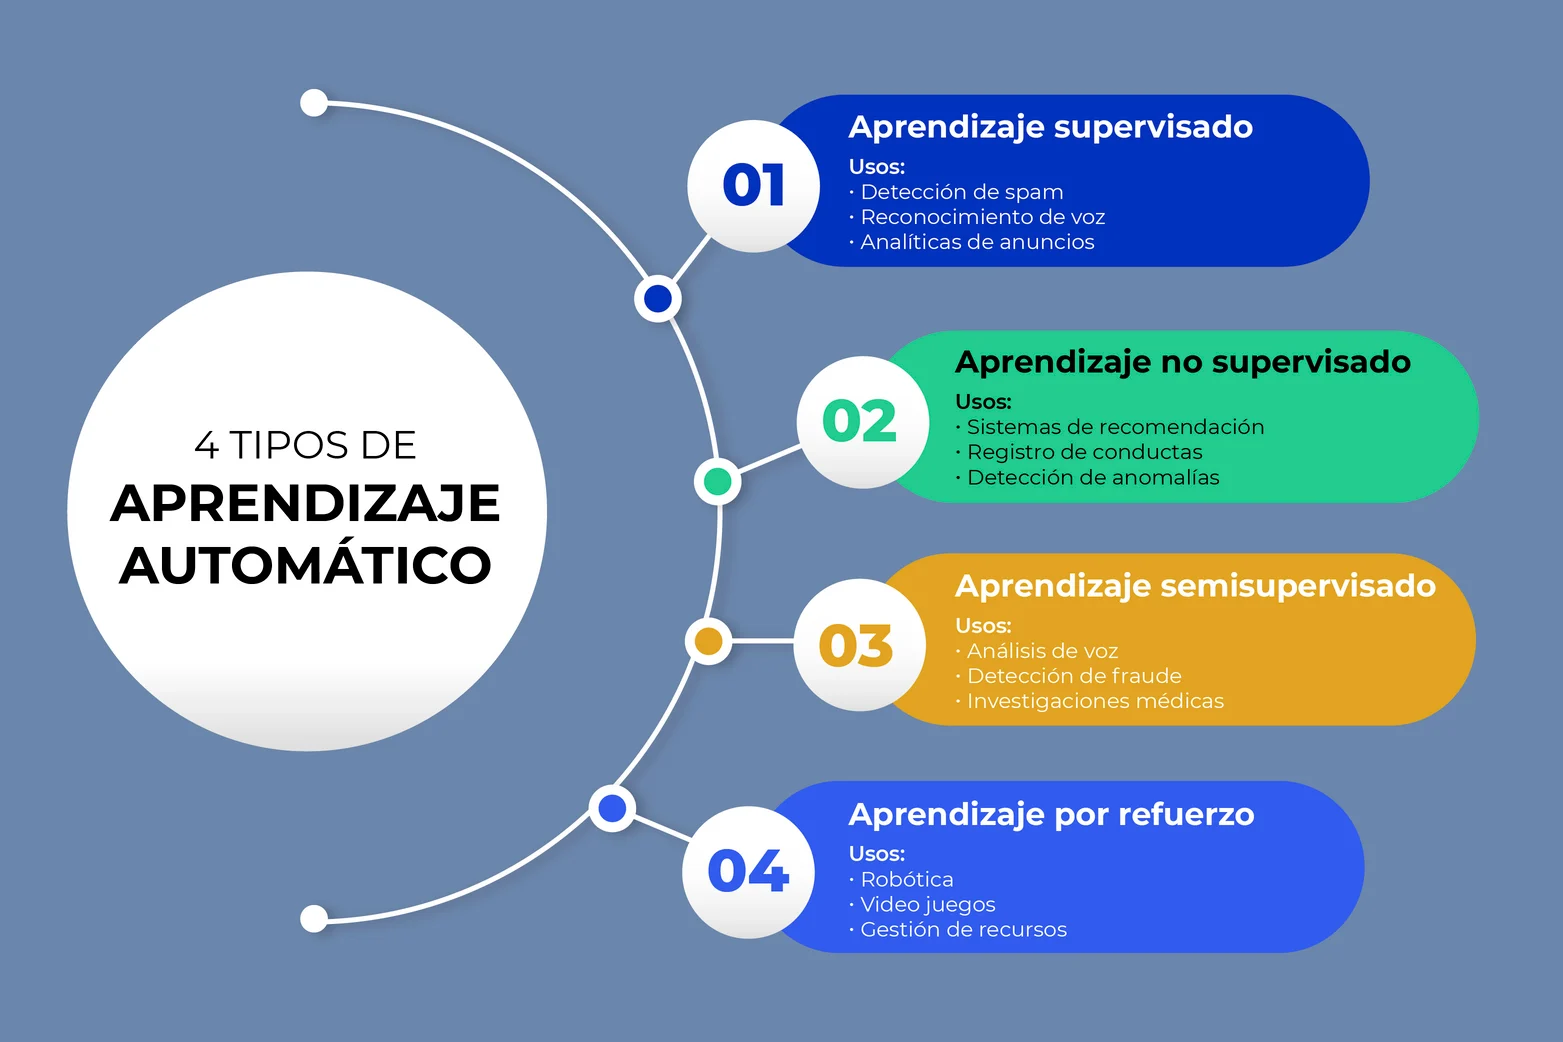

### Desarrollar un clasificador de ropa a partir del Data set Mnist Fashion
##### Datos: 60, 000 mil imagenes de entrenamiento y 10,000 imagenes de prueba
##### Como es un entrenamiento supervisado ya esta eticado en 10 clases
##### Las imagenes ya se encuentran en escala de grises de 28x28 eso quiere decir que vamos a tener 784 neuronas de entrada

In [ ]:
!pip install -U tensorboard
!pip install tensorflow
!pip install opencv-python

In [2]:
import tensorflow as tf
print(tf.__version__)


2.10.1


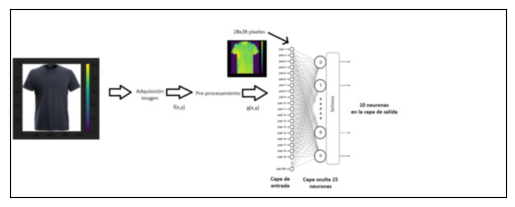

In [3]:
#instalar la librerias
#!pip install tensorflow
import cv2
import matplotlib.pyplot as plt
#Cargar la imagen con openCV
imgBGR = cv2.imread('Modelored.jpg')
#Cambiar esacio de color BGR a RGB
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
#Mostrar imagen
plt.xticks([]), plt.yticks([])
plt.imshow(imgRGB, cmap='gray', interpolation='bicubic')
plt.show()


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
#importamos tf2 y keras
import tensorflow as tf
from tensorflow import keras #kit de herramientas para redes neuronales


#usaremos datatime para nombrar archivos
import datetime 

import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

from PIL import Image
import requests
import urllib.request 
from io import BytesIO

import cv2 #procesamiento de imagenes que será implementada para escalar


In [5]:
print(cv2.__version__)

4.7.0


In [6]:
#Importar Dataset
#Se usan 60,000 imagenes para entrenar la red y 10,000 para evaluar con que precision aprendio la red 
#para clasificar las imagenes de ropa. Mnist directamente desde Tensorflow

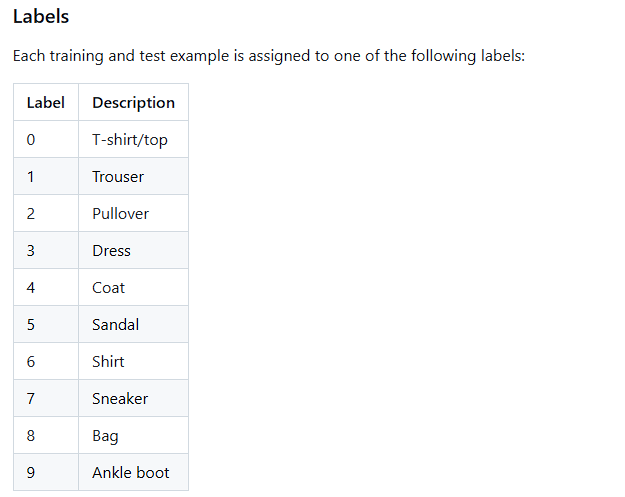

In [7]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

In [2]:
#Mostrar una de las imagenes del dataset
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show

NameError: name 'plt' is not defined

In [9]:
#Las etiquetas son una matriz de enteros que van de 0 a 9. Estas corresponden a la clase de ropa de 
#c/imagen

In [10]:
#Vamos a crear una lista con los tipos de prendas que encontramos en el dataset

In [11]:
class_names=['Camiseta','Pantalon','Sueter','Vestido','Abrigo','Sandalia', 'Camisa','tenis', 'bolso','botines']

# Explorando imagenes de entrenamiento

In [12]:
train_images[10].shape

(28, 28)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
#Ver como lucen las etiquetas que son las "y" del entrenamiento supervisado

In [16]:
train_labels.shape

(60000,)

In [17]:
test_labels.shape

(10000,)

In [18]:
#Ver como lucen los elementos del tensor, las 10 clases

In [19]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [20]:
#Ver como luce una imagen, minimo es 0 y el máximo es 255. La imagen es en el escala de grises
test_images[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145, 190,
         97, 109, 105, 187,  76,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 170, 163, 208,
        243, 240, 229, 173, 162, 154,  18,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  39, 158, 196, 149, 191, 199,
        223, 243, 186, 191, 170, 155, 162, 126,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   0, 105, 161, 150, 141, 130, 199, 239,
        229, 220, 188, 244, 145, 128, 142, 151, 175,  23,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 150, 137, 134, 130, 147, 121, 241,
        255, 114, 240, 173, 142, 136, 132, 128, 153, 113,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  17, 157, 129, 146, 149, 137, 141, 177,
        200, 200, 207, 134, 145, 142, 140, 132, 129, 140,   3,   0,   0,
          0,   0],
       [  

# Reescalar las imagenes de 0-1
La reescala de imágenes de 0 a 255 a un rango de 0 a 1 es una práctica común en el procesamiento de imágenes. Esto se hace por varias razones:

Reducción de la complejidad: Al reescalar las imágenes a un rango de 0 a 1, se reduce la complejidad de los datos. En lugar de manejar valores enteros de 0 a 255, ahora se manejan valores de punto flotante entre 0 y 1. Esto hace que el procesamiento de las imágenes sea más eficiente y consume menos recursos.

Normalización de datos: Algunos algoritmos de aprendizaje automático, como las redes neuronales, se benefician de tener datos normalizados. Reescalar las imágenes de 0 a 255 a un rango de 0 a 1 es una forma de normalizar los datos de las imágenes.

Consistencia de datos: Al trabajar con varias imágenes, es importante tener una consistencia en los datos. Reescalar todas las imágenes a un rango de 0 a 1 asegura que todos los datos estén en el mismo rango.

<function matplotlib.pyplot.show(close=None, block=None)>

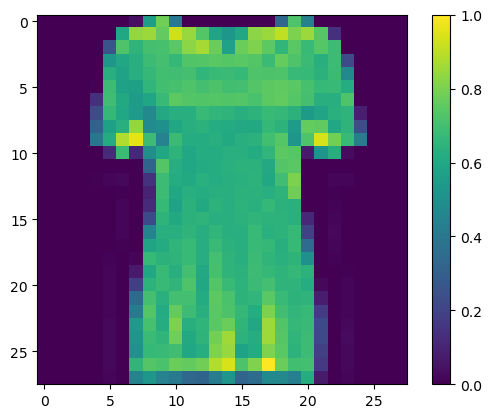

In [21]:
train_images=train_images/255
test_images=test_images/255
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show

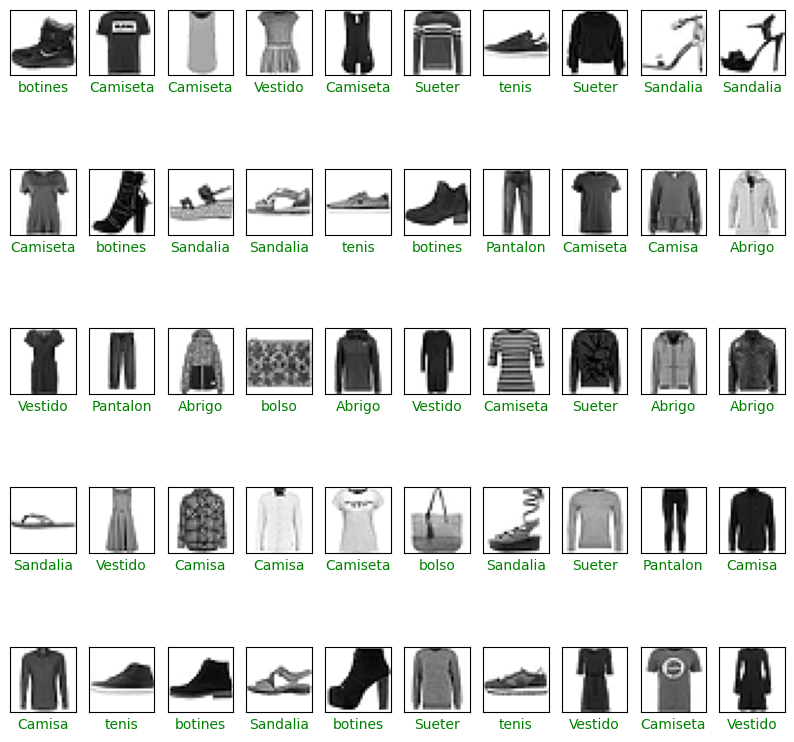

In [22]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='green')
plt.show()
    

# Configurando la red neuronal

In [23]:
modelo=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Capa de entrada plana
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [25]:
#La capa de entranda no tiene pesos
#lA capa oculta tiene 11775 pesos para ajustar
#la ultima capa de salida adiciona 160 mas

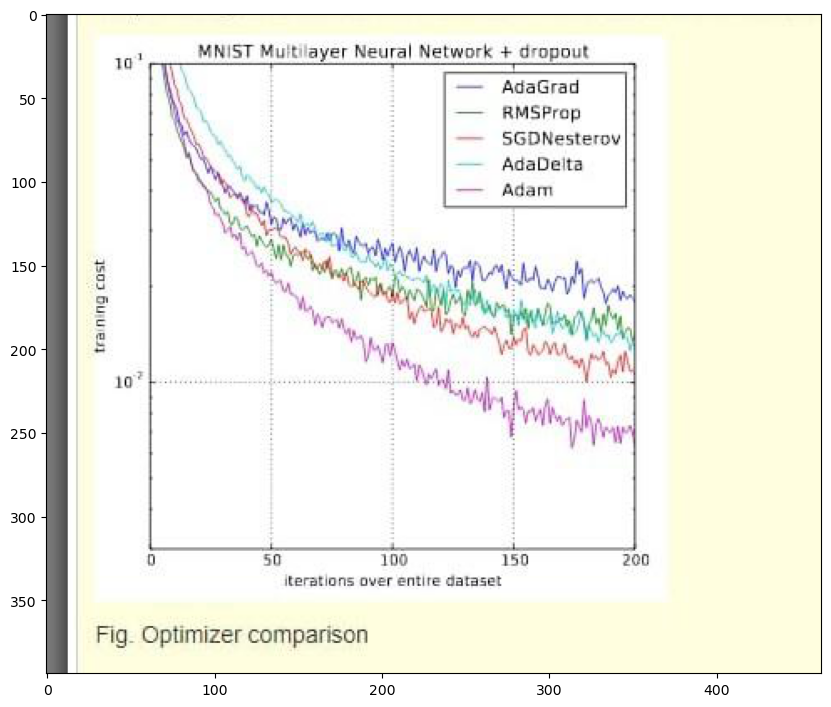

In [26]:
#Ajustar los pesos del modelo para minimizar el costo
#Mejoras al Gradiente descendiente estocastico
url= 'https://media.cheggcdn.com/study/858/8582ee82-a232-4a94-bcfa-76682349104a/image'
Optimizadores=Image.open(urllib.request.urlopen(url))
imagen1=np.array(Optimizadores)
plt.figure(figsize=(10,10))
plt.imshow(imagen1)


In [27]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# 1 Se entrena el modelo
# 2 Se guardan los pesos para la prox eje


In [62]:
#Le pasamos las imagenes de entrenamiento, las etiquetas y las epocas
#modelo.fit(train_images, train_labels, epochs=10)

checkpoint_path = "checkpoints"
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

modelo.fit(train_images,
           train_labels,
           epochs=10,
           batch_size=32,
           callbacks=[cp_callbacks])

Epoch 1/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.3383 - accuracy: 0.8786
Epoch 1: saving model to checkpoints
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3386 - accuracy: 0.8785
Epoch 2/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.3372 - accuracy: 0.8793
Epoch 2: saving model to checkpoints
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3370 - accuracy: 0.8794
Epoch 3/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.3366 - accuracy: 0.8781
Epoch 3: saving model to checkpoints
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8781
Epoch 4/10
1853/1875 [============================>.] - ETA: 0s - loss: 0.3367 - accuracy: 0.8778
Epoch 4: saving model to checkpoints
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3358 - accuracy: 0.8781
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.3354 - accuracy: 0.879

# Observar precision del entrenamiento

In [63]:
test_loss, test_acc=modelo.evaluate(test_images, test_labels)
print("Precision ->", test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.8491
Precision -> 0.8490999937057495


## Si el valor fuera mayor  accuracy: 0.8459 fuera mayor
## al del test de entrenamiento  accuracy: 0.8303 
## ocurre un sobre ajuste por lo que el modelo funcionaria
## solo con los datos que ya conoce

In [31]:
# Predicciones
predicciones=modelo.predict(test_images)

313/313 [==============================] - 0s 779us/step


In [32]:
predicciones[1]

array([5.5836502e-04, 3.0644808e-16, 9.6609372e-01, 2.4292383e-06,
       1.2662648e-02, 1.6847179e-35, 2.0682178e-02, 0.0000000e+00,
       7.2632150e-07, 0.0000000e+00], dtype=float32)

In [33]:
np.argmax(predicciones[1])

2

In [34]:
print(class_names)

['Camiseta', 'Pantalon', 'Sueter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'tenis', 'bolso', 'botines']


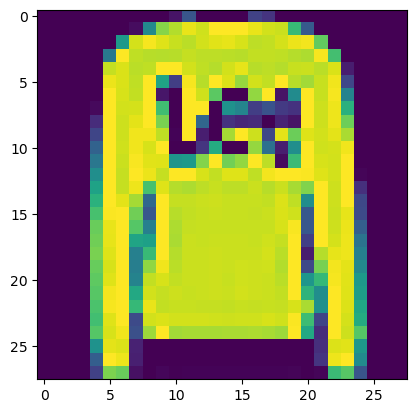

In [35]:
plt.imshow(test_images[1])

# Probando una imagen ajena al dataset

In [36]:
url= 'https://m.media-amazon.com/images/I/51yHdB1C5RL._AC_SL1000_.jpg'
img=Image.open(urllib.request.urlopen(url))

<function matplotlib.pyplot.show(close=None, block=None)>

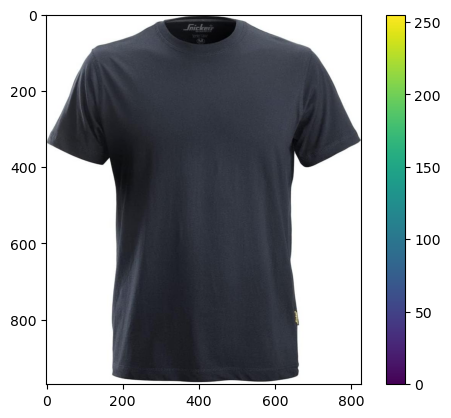

In [37]:
imagen_prueba=np.array(img)
plt.figure()
plt.imshow(imagen_prueba)
plt.colorbar()
plt.grid(False)
plt.show

In [38]:
imagen_prueba.shape

(970, 827, 3)

In [39]:
imagen_de_prueba=255-imagen_prueba

<function matplotlib.pyplot.show(close=None, block=None)>

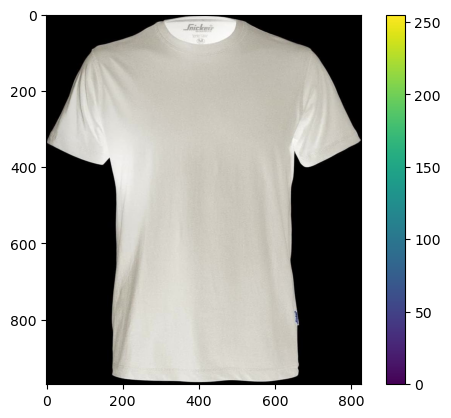

In [40]:
plt.figure()
plt.imshow(imagen_de_prueba)
plt.colorbar()
plt.grid(False)
plt.show

In [41]:
imagen_de_prueba.shape

(970, 827, 3)

In [42]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.333,0.333,0.333])

In [43]:
imagen_de_prueba_gray=rgb2gray(imagen_de_prueba)

<function matplotlib.pyplot.show(close=None, block=None)>

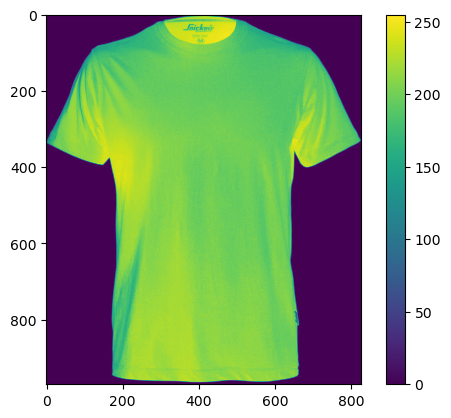

In [44]:
plt.figure()
plt.imshow(imagen_de_prueba_gray)
plt.colorbar()
plt.grid(False)
plt.show

In [45]:
imagen_de_prueba_gray.shape

(970, 827)

In [46]:
rescalar=cv2.resize(imagen_de_prueba_gray, dsize=(28,28), interpolation=cv2.INTER_CUBIC)

<function matplotlib.pyplot.show(close=None, block=None)>

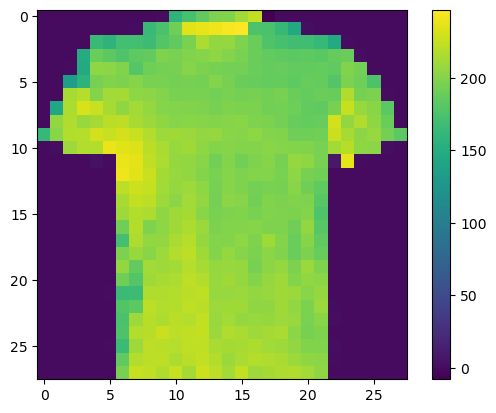

In [47]:
plt.figure()
plt.imshow(rescalar)
plt.colorbar()
plt.grid(False)
plt.show

In [48]:
rescalar2=rescalar/255

<function matplotlib.pyplot.show(close=None, block=None)>

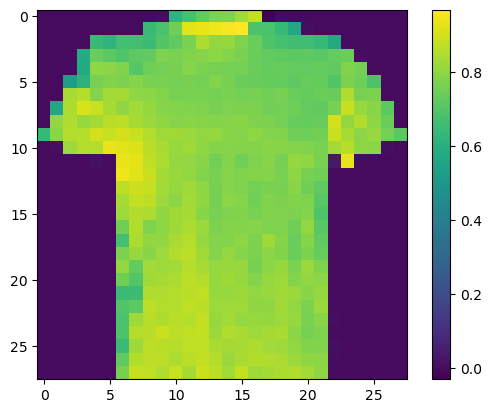

In [49]:
plt.figure()
plt.imshow(rescalar2)
plt.colorbar()
plt.grid(False)
plt.show

In [50]:
x=np.zeros((1,28,28))

In [51]:
x.shape

(1, 28, 28)

In [52]:
x[0]=np.array(rescalar2)

In [54]:
predicciones=modelo.predict(x)
predicciones

1/1 [==============================] - 0s 18ms/step


array([[9.7610450e-01, 1.5512523e-17, 2.4507441e-09, 1.9636735e-05,
        4.2600194e-11, 0.0000000e+00, 2.3875786e-02, 0.0000000e+00,
        1.7794656e-14, 0.0000000e+00]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

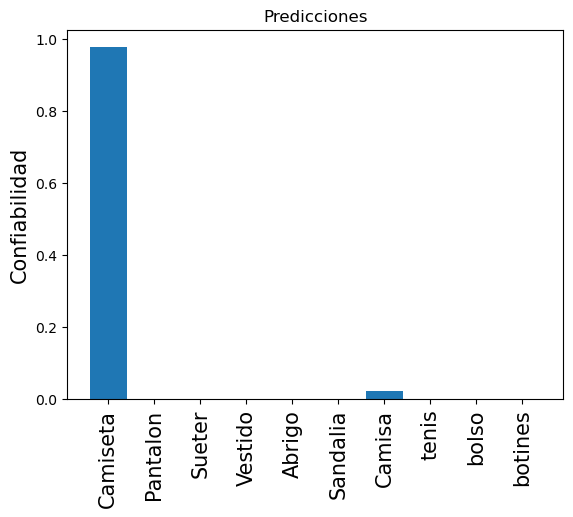

In [55]:
index=np.arange(len(class_names))
plt.bar(index, predicciones[0])
plt.ylabel('Confiabilidad',fontsize=15)
plt.xticks(index,class_names, fontsize=15,rotation=90)
plt.title('Predicciones')
plt.show

# Probando un nuevo modelo con los pesos guardados 

In [56]:
modelo2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Capa de entrada plana
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [57]:
loss, acc=modelo2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.3660 - accuracy: 0.1101


In [58]:
acc

0.11010000109672546

In [59]:
modelo2.load_weights(checkpoint_path)
loss,acc=modelo2.evaluate(test_images,test_labels)
acc

313/313 [==============================] - 1s 2ms/step - loss: 0.4819 - accuracy: 0.8407


0.8406999707221985

In [60]:
!pip install --upgrade tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [39 lines of output]
  Traceback (most recent call last):
    File "C:\Users\sk_al\anaconda3\envs\entornoGPU\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = parse_requirement(requirement_string)
    File "C:\Users\sk_al\anaconda3\envs\entornoGPU\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "C:\Users\sk_al\anaconda3\envs\entornoGPU\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "C:\Users\sk_al\anaconda3\envs\entornoGPU\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
      marker = _parse_requirement_marker(
    File "C:\Users\sk